
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [7]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [8]:
df.drop(105,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [11]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
df.set_index('Month',inplace=True)

In [13]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [14]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

<AxesSubplot:xlabel='Month'>

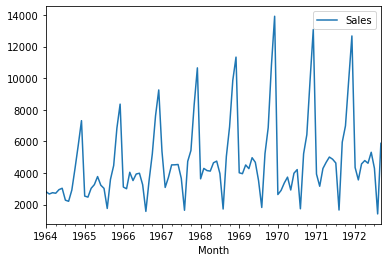

In [15]:
df.plot()

In [16]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df['Sales'])

In [18]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [19]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [20]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [21]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [22]:
df.head()

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [23]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [24]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [25]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

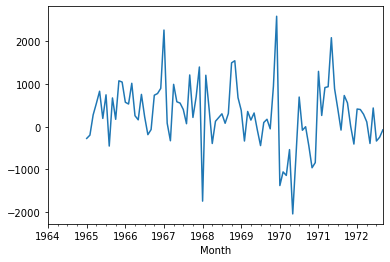

In [26]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
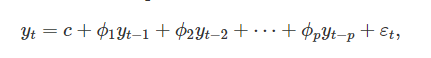

In [27]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

ModuleNotFoundError: No module named 'pandas.tools'

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [28]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [29]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\AN20259618\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AN20259618\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sun, 12 Feb 2023   AIC                           1910.251
Time:                        00:19:16   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7853     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

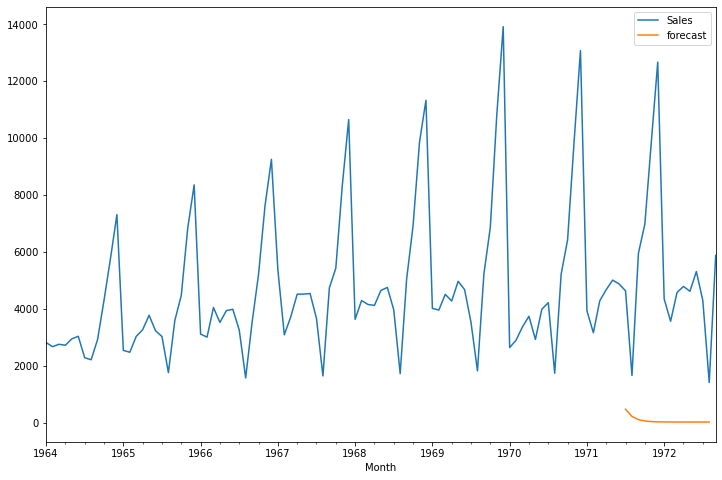

In [31]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [32]:
import statsmodels.api as sm

In [33]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\AN20259618\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\AN20259618\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

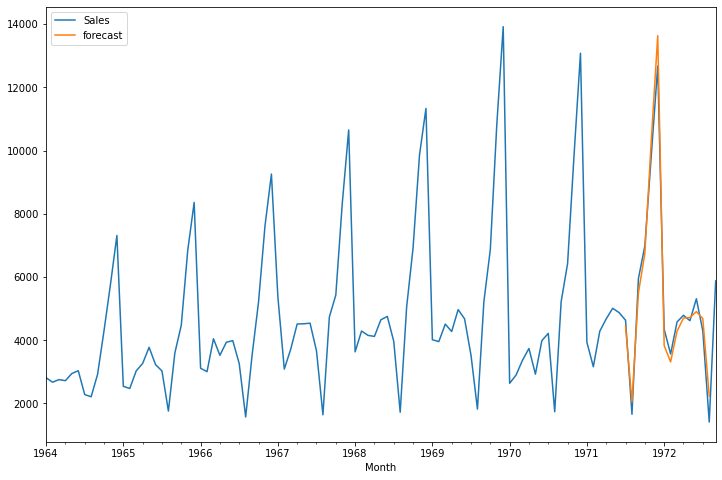

In [34]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [36]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [37]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [38]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

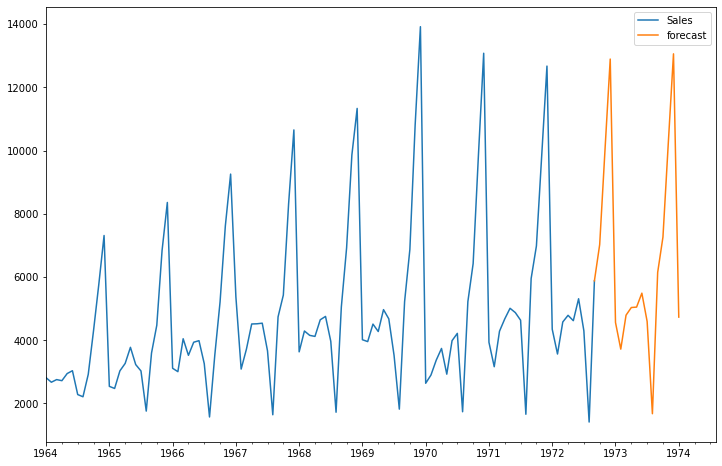

In [39]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

# Time Series To Supervised Regression

In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# Load the stock market data into a pandas DataFrame
data =pd.read_csv('perrin-freres-monthly-champagne-.csv')
data.columns=["Month","Sales"]
data.drop(105,axis=0,inplace=True)
data.drop(106,axis=0,inplace=True)
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month',inplace=True)
data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<AxesSubplot:xlabel='Month'>

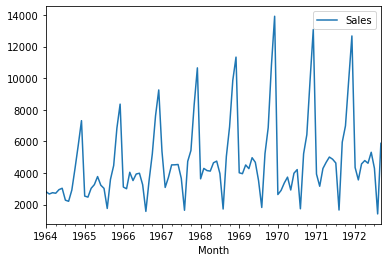

In [42]:
data.plot()

In [43]:

# Create a new column for the previous closing price
data['prev_Sales'] = data['Sales'].shift(1)
data.dropna(inplace=True)

In [44]:
data.head()

,Sales,prev_Sales
Month,,
1964-02-01,2672.0,2815.0
1964-03-01,2755.0,2672.0
1964-04-01,2721.0,2755.0
1964-05-01,2946.0,2721.0
1964-06-01,3036.0,2946.0


In [45]:
data.shape

(104, 2)

In [46]:
# Split the data into training and testing sets
train_data = data[:-20]
test_data = data[-20:]

In [47]:

# Split the data into input and output variables
train_x = train_data[['prev_Sales']]
train_y = train_data[['Sales']]
test_x = test_data[['prev_Sales']]
test_y = test_data[['Sales']]

# Fit a Random Forest Regressor to the training data
reg = RandomForestRegressor(n_estimators=100, random_state=42).fit(train_x, train_y)

# Make predictions on the test data
pred_y = reg.predict(test_x)

# Evaluate the performance of the model
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


C:\Users\AN2025~1\AppData\Local\Temp/ipykernel_15472/2738293917.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg = RandomForestRegressor(n_estimators=100, random_state=42).fit(train_x, train_y)


Mean Squared Error: 2011371.8324915306
R-squared: 0.6626744692920775


In [72]:
train_x.tail()

,prev_Sales
Month,
1970-09-01,1738.0
1970-10-01,5221.0
1970-11-01,6424.0
1970-12-01,9842.0
1971-01-01,13076.0


In [77]:
a = reg.predict(test_x)

In [78]:
# Get the dates for the test set
dates = test_data.index

In [80]:
dates

DatetimeIndex(['1971-02-01', '1971-03-01', '1971-04-01', '1971-05-01',
               '1971-06-01', '1971-07-01', '1971-08-01', '1971-09-01',
               '1971-10-01', '1971-11-01', '1971-12-01', '1972-01-01',
               '1972-02-01', '1972-03-01', '1972-04-01', '1972-05-01',
               '1972-06-01', '1972-07-01', '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [90]:
# Create a DataFrame from the test output
result = pd.DataFrame({'Sales': a}, index=dates)

In [91]:
result.head()

,Sales
Month,
1971-02-01,3918.16
1971-03-01,3052.72
1971-04-01,4227.92
1971-05-01,3998.44
1971-06-01,6476.29


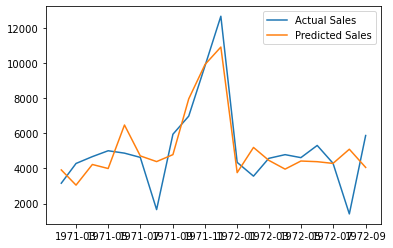

In [83]:
# Plot the actual closing prices
plt.plot(dates, test_y, label='Actual Sales')

# Plot the predicted closing prices
plt.plot(dates, result, label='Predicted Sales')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [94]:
dates

DatetimeIndex(['1971-02-01', '1971-03-01', '1971-04-01', '1971-05-01',
               '1971-06-01', '1971-07-01', '1971-08-01', '1971-09-01',
               '1971-10-01', '1971-11-01', '1971-12-01', '1972-01-01',
               '1972-02-01', '1972-03-01', '1972-04-01', '1972-05-01',
               '1972-06-01', '1972-07-01', '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [130]:
import matplotlib.pyplot as plt
import pandas as pd


all_pred = np.concatenate([train_y, test_y])
all_op = np.concatenate([train_y, result])

# Get the dates for the entire dataset
all_dates = np.concatenate([train_data.index, dates])


<AxesSubplot:>

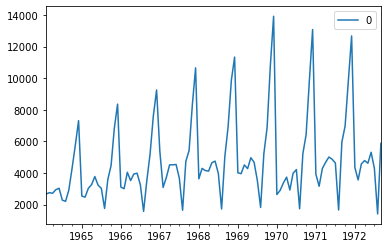

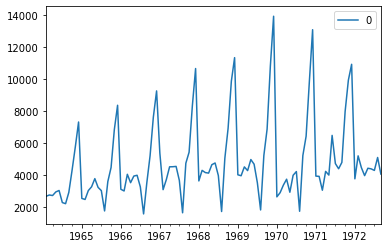

In [131]:
pd.DataFrame(all_pred, index=all_dates).plot()

pd.DataFrame(all_op, index=all_dates).plot()

In [48]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(train_x, train_y)

# Make predictions on the test data
pred_y = reg.predict(test_x)

# Evaluate the performance of the model
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
train_x = train_data[['prev_Sales']].values.ravel()
train_y = train_data[['Sales']].values.ravel()
test_x = test_data[['prev_Sales']]
test_y = test_data[['Sales']]


param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.001, 0.01, 0.1, 'scale', 'auto'],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Use GridSearchCV to perform hyperparameter tuning
reg = GridSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', cv=5)
reg.fit(train_x, train_y)

# Print the best hyperparameters
print("Best Hyperparameters:", reg.best_params_)

pred_y = reg.predict(test_x)

# Evaluate the performance of the model
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)
print("Mean Squared Error:", mse)
print("R-squared:", r2)